In [1]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tensorflow import keras 
import tensorflow as tf

# Dataset Loading

In [2]:
train_data_path=r"F:\BD MSc\Jahangirnagar MSc\MSc Research\Leaf Disease\Corn Leaves Diseases Detection\Implementation\data\Train"
test_data_path=r"F:\BD MSc\Jahangirnagar MSc\MSc Research\Leaf Disease\Corn Leaves Diseases Detection\Implementation\Augmented Data"

# Train & Test Data Separation

In [3]:
CATEGORIES=["Blight","Common_Rust","Gray_Leaf_Spot","Eyespot","Healthy"]

In [4]:
train_data=[] #List of the data for training

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(train_data_path,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])

In [5]:
test_data=[] #List of the data for test
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(test_data_path,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])

In [6]:
print(len(train_data))
print(len(test_data))

5790
3258


In [7]:
import random
random.shuffle(train_data)
random.shuffle(test_data)

# Test Train Split

In [8]:
X_train=[]
y_train=[]

In [9]:
for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [10]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("Blight")
    elif i==1:
        Y.append("Common_Rust")
    elif i==2:
        Y.append("Gray_Leaf_Spot")
    elif i==3:
        Y.append("Eyespot")
    else:
        Y.append("Healthy")
    

len(X_train),len(y_train)

(5790, 5790)

In [11]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("Blight")
    elif i==1:
        Z.append("Common_Rust")
    elif i==2:
        Z.append("Gray_Leaf_Spot")
    elif i==3:
        Z.append("Eyespot")
    else:
        Z.append("Healthy")

len(X_test),len(y_test)

(3258, 3258)

# Reshaping Test&Train Data

In [12]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

(5790, 64, 64, 3)

In [13]:
X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(3258, 64, 64, 3)

# Data Visualization

In [14]:
order=["Blight","Common_Rust","Gray_Leaf_Spot","Eyespot","Healthy"]

Text(0, 0.5, 'Image Count')

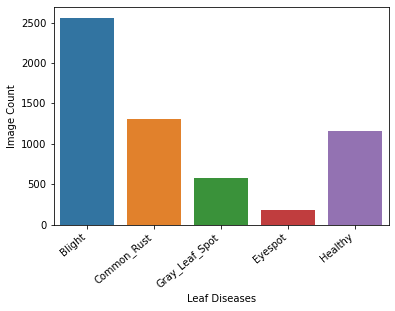

In [15]:
ax=sns.countplot(Y, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

Text(0, 0.5, 'Image Count')

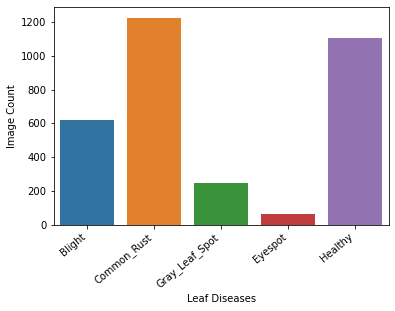

In [16]:
ax=sns.countplot(Z, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

# Converting dataset labels vector to categorical data matrix

In [17]:
from tensorflow.keras.utils import to_categorical

one_hot_train=to_categorical(y_train)
one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [37]:
one_hot_test.shape

(3258, 5)

In [46]:
print(one_hot_test)

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


# Building Convolutional Neural Network

In [18]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

In [19]:
classifier=Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=5))

In [20]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [22]:
hist=classifier.fit(X_train,one_hot_train,epochs=15,batch_size=128,validation_split=0.2)

Epoch 1/15
37/37 [==============================] - 40s 1s/step - loss: 1.1064 - accuracy: 0.5680 - val_loss: 0.6742 - val_accuracy: 0.7763
Epoch 2/15
37/37 [==============================] - 51s 1s/step - loss: 0.5894 - accuracy: 0.7876 - val_loss: 0.5762 - val_accuracy: 0.7902
Epoch 3/15
37/37 [==============================] - 45s 1s/step - loss: 0.4597 - accuracy: 0.8301 - val_loss: 0.6083 - val_accuracy: 0.7789
Epoch 4/15
37/37 [==============================] - 44s 1s/step - loss: 0.4267 - accuracy: 0.8370 - val_loss: 0.4380 - val_accuracy: 0.8549
Epoch 5/15
37/37 [==============================] - 41s 1s/step - loss: 0.3857 - accuracy: 0.8586 - val_loss: 0.4270 - val_accuracy: 0.8575
Epoch 6/15
37/37 [==============================] - 40s 1s/step - loss: 0.3469 - accuracy: 0.8655 - val_loss: 0.4319 - val_accuracy: 0.8437
Epoch 7/15
37/37 [==============================] - 41s 1s/step - loss: 0.3259 - accuracy: 0.8767 - val_loss: 0.3519 - val_accuracy: 0.8739
Epoch 8/15
37/37 [==

# Test Loss and Accuracy

In [23]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
test_loss,test_acc

102/102 [==============================] - 8s 82ms/step - loss: 0.4184 - accuracy: 0.8557


(0.41840705275535583, 0.8557397127151489)

# Classification Report

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [31]:
pred_ran=classifier.predict(X_test)

In [47]:
pred_ran.shape

(3258, 5)

In [51]:
print(one_hot_test)

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [34]:
print(pred_ran)

[[1.8259825e-02 1.4226322e-02 1.5134953e-03 3.8985364e-04 9.6561050e-01]
 [2.1828576e-07 9.9999976e-01 2.4078865e-08 7.7562659e-09 2.4461747e-11]
 [9.1695523e-01 7.6880343e-03 7.5326666e-02 2.5655143e-05 4.3720829e-06]
 ...
 [9.9905294e-01 3.5370197e-04 5.9156114e-04 1.2891632e-06 4.1761336e-07]
 [1.2267528e-01 3.9369881e-02 1.3607041e-02 4.0198313e-03 8.2032794e-01]
 [4.1169550e-02 4.3699857e-02 9.4533637e-03 1.3405918e-03 9.0433669e-01]]


In [53]:
pred_ran=(pred_ran>0.5)

In [50]:
print(order)

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Eyespot', 'Healthy']


In [54]:
print(classification_report(one_hot_test,pred_ran,target_names=order))

                precision    recall  f1-score   support

        Blight       0.61      0.98      0.75       618
   Common_Rust       0.99      0.90      0.94      1228
Gray_Leaf_Spot       0.83      0.06      0.11       245
       Eyespot       0.81      0.21      0.33        63
       Healthy       0.99      0.92      0.96      1104

     micro avg       0.87      0.85      0.86      3258
     macro avg       0.85      0.61      0.62      3258
  weighted avg       0.90      0.85      0.84      3258
   samples avg       0.85      0.85      0.85      3258



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
confusion_matrix(one_hot_test,pred_ran)

ValueError: multilabel-indicator is not supported

In [62]:
confusion_matrix(one_hot_test.argmax(axis=1), pred_ran.argmax(axis=1))

array([[ 610,    4,    1,    2,    1],
       [ 119, 1104,    1,    1,    3],
       [ 226,    3,   15,    0,    1],
       [  44,    3,    1,   13,    2],
       [  81,    3,    0,    0, 1020]], dtype=int64)

# Learning Curve

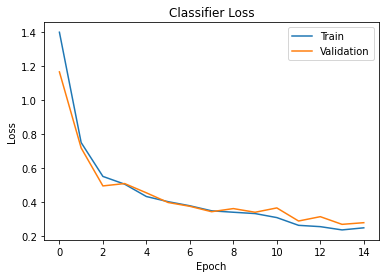

In [67]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

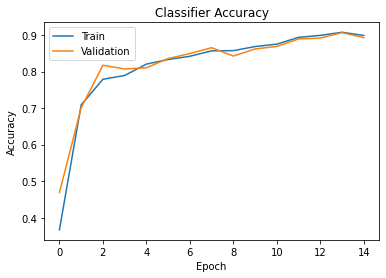

In [68]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [69]:
y_pred=classifier.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([4, 1, 0, ..., 2, 3, 1], dtype=int64)

In [70]:
y_prob=classifier.predict_proba(X_test)
y_prob

Instructions for updating:
Please use `model.predict()` instead.


array([[7.14589730e-02, 1.32831438e-02, 1.68397278e-02, 2.53803632e-03,
        8.95880163e-01],
       [4.90916520e-03, 9.94989574e-01, 6.32113370e-06, 9.29076923e-05,
        2.14401825e-06],
       [5.57092130e-01, 2.89514810e-01, 1.42655328e-01, 9.74468049e-03,
        9.93023161e-04],
       ...,
       [4.94367853e-02, 3.40145919e-03, 9.46799099e-01, 1.04769315e-04,
        2.57955893e-04],
       [3.55624594e-02, 2.08594203e-02, 8.49915482e-03, 9.34541285e-01,
        5.37610264e-04],
       [3.16701306e-04, 9.99677658e-01, 2.77005529e-06, 2.06049231e-06,
        8.46333535e-07]], dtype=float32)

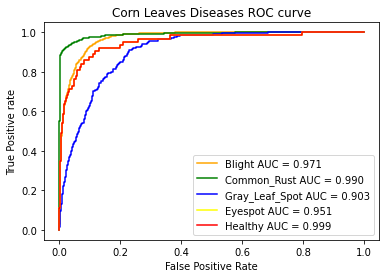

In [71]:
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
      
plt.plot(fpr[0], tpr[0], color='orange',label='Blight AUC = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green',label='Common_Rust AUC = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue',label='Gray_Leaf_Spot AUC = %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='yellow',label='Eyespot AUC = %0.3f' % roc_auc[3])
plt.plot(fpr[3], tpr[3], color='red',label='Healthy AUC = %0.3f' % roc_auc[4])
 
plt.title('Corn Leaves Diseases ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

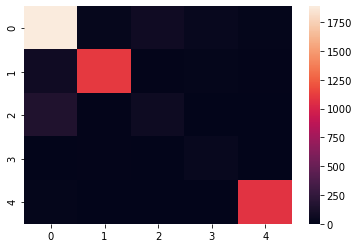

In [72]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)